# Advanced Multivariate Statistics
# Lecture 2 - Multi-Output Regression and Classification in `scikit-learn`

* Implemented in the `mutliclass` and `multioutput` modules

> The modules in this section implement meta-estimators, which require a base estimator to be provided in their constructor. Meta-estimators extend the functionality of the base estimator to support multi-learning problems, which is accomplished by transforming the multi-learning problem into a set of simpler problems, then fitting one estimator per problem.

![multiclass-and-multioutput](https://scikit-learn.org/stable/_images/multi_org_chart.png)


In [1]:
from sklearn import set_config
set_config(display='diagram')

## Display the `MultiOutputClassifier` on Randomly Generated Data

### Random Data Generation

In [2]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.utils import shuffle

X, y1 = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_classes=3,
    random_state=42
    )

y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)

Y = np.vstack((y1, y2, y3)).T

Y[:5]

array([[2, 0, 1],
       [1, 1, 2],
       [1, 2, 1],
       [1, 1, 0],
       [2, 1, 1]])

### Train-test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, shuffle=True
)

### LogisticRegression Pipeline & Scoring

In [4]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

logreg_pipeline = Pipeline(
    steps = [
        ("scaling", StandardScaler()),
        ("multi-logreg", MultiOutputClassifier(LogisticRegressionCV()))
    ]
)

logreg_pipeline

Pipeline(steps=[('scaling', StandardScaler()),
                ('multi-logreg',
                 MultiOutputClassifier(estimator=LogisticRegressionCV()))])

In [5]:
_ = logreg_pipeline.fit(X_train, Y_train)

In [6]:
logreg_pipeline.score(X_test, Y_test)

0.068

In [7]:
logreg_pipeline.predict(X_test)[:5]

array([[1, 0, 1],
       [2, 2, 0],
       [2, 2, 0],
       [2, 0, 1],
       [1, 0, 1]])

In [8]:
probabs = logreg_pipeline.predict_proba(X_test) # this is a list of three arrays!

np.array([probabs[mclass][:5] for mclass in range(0,3)])

array([[[0.04974267, 0.52375274, 0.4265046 ],
        [0.01718343, 0.00470696, 0.97810961],
        [0.00806445, 0.08381165, 0.9081239 ],
        [0.01600067, 0.03316489, 0.95083444],
        [0.05828004, 0.89655378, 0.04516618]],

       [[0.39942234, 0.29606231, 0.30451536],
        [0.35808566, 0.26720853, 0.3747058 ],
        [0.36487642, 0.26576472, 0.36935886],
        [0.35588356, 0.29068146, 0.35343498],
        [0.34717186, 0.32577714, 0.327051  ]],

       [[0.33142558, 0.33752488, 0.33104954],
        [0.33410621, 0.33376595, 0.33212784],
        [0.33541682, 0.33405306, 0.33053012],
        [0.33365107, 0.33488202, 0.33146691],
        [0.33113005, 0.33744329, 0.33142666]]])

### Another Pipeline

In [9]:
from sklearn.ensemble import HistGradientBoostingClassifier

rf_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("gradient_boosted_tree", MultiOutputClassifier(HistGradientBoostingClassifier(random_state=42)))
    ]
)

_ = rf_pipeline.fit(X_train, Y_train)

In [10]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(rf_pipeline, X_train, Y_train, scoring="neg_log_loss")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 309, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 2379, in log_loss
    y_pred = check_array(y_pred, ensure_2d=False)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py", line 796, in check_array
    % (array.ndim, estimator_name)
ValueError: Found a

In [11]:
cv_results = cross_validate(rf_pipeline, X_train, Y_train, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.9s finished


In [12]:
cv_results

{'fit_time': array([2.57650185, 2.55085516, 2.50937939, 2.51600122, 2.52361488]),
 'score_time': array([0.03639674, 0.03963113, 0.03089237, 0.03869057, 0.03429794]),
 'test_score': array([0.08666667, 0.09333333, 0.08666667, 0.12      , 0.1       ])}

In [13]:
rf_pipeline.score(X_test, Y_test)

0.136

## Code Along: Titanic Dataset

1. Load the titanic dataset using `sklearn`'s `fetch_openml`:

In [14]:
from sklearn.datasets import fetch_openml

bunch = fetch_openml("titanic", version=1)

data = bunch.frame

In [15]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


2. Inspect the columns and analyse the data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


Here is a gloxary of the columns:

* `survival`: 0 = no, 1 = yes
* `pclass`: 1 = 1st, 2 = 2nd, 3 = 3rd
* `name`: passenger name
* `sex`: passenger sex (`male`, `female`)
* `age`: age in years
* `sibsp` = number of sibilings / spouses abroad
* `parch` = number of parents / children abroad
* `ticket` = ticket number (can be the same for members of the same families)
* `fare` = ticket cost
* `cabin` = cabin number
* `embarked` = port of embrarkation: `C` for Chernourg, `Q` for Queenstown, `S` for Southhampton
* `boat` = lifeboat number (if survived)
* `body` = body number (if not survive and body was recovered)
* `home.dest` = supposed destination
* `survived` = whether the passenger survived

We can see that the data types are messy. Fortunatley, we can use the `DataFrame.convert_dtypes()` method to automatically cast them in more appropriate pandas datatypes:

In [17]:
data.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   Int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   string  
 3   sex        1309 non-null   category
 4   age        1046 non-null   Float64 
 5   sibsp      1309 non-null   Int64   
 6   parch      1309 non-null   Int64   
 7   ticket     1309 non-null   string  
 8   fare       1308 non-null   Float64 
 9   cabin      295 non-null    string  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    string  
 12  body       121 non-null    Int64   
 13  home.dest  745 non-null    string  
dtypes: Float64(2), Int64(4), category(3), string(5)
memory usage: 124.5 KB


Note that the memory consumption changes as well! We can now use these information to select our final data.

In [18]:
import pandas as pd

titanic = (
    data
    .convert_dtypes()
    .assign(has_family = lambda df: df.filter(["sibsp", "parch"]).any(axis="columns").astype("category"))
    .drop(columns=["name", "cabin", "sibsp", "parch", "ticket", "boat", "body", "home.dest"])
    .dropna()
)

titanic.head()

,pclass,survived,sex,age,fare,embarked,has_family
0,1,1,female,29.0,211.3375,S,False
1,1,1,male,0.9167,151.55,S,True
2,1,0,female,2.0,151.55,S,True
3,1,0,male,30.0,151.55,S,True
4,1,0,female,25.0,151.55,S,True


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      1043 non-null   Int64   
 1   survived    1043 non-null   category
 2   sex         1043 non-null   category
 3   age         1043 non-null   Float64 
 4   fare        1043 non-null   Float64 
 5   embarked    1043 non-null   category
 6   has_family  1043 non-null   category
dtypes: Float64(2), Int64(1), category(4)
memory usage: 40.2 KB


To explore the relationship between variables, we can use a pairplot and specify a categorical variable as a `hue` parameter:

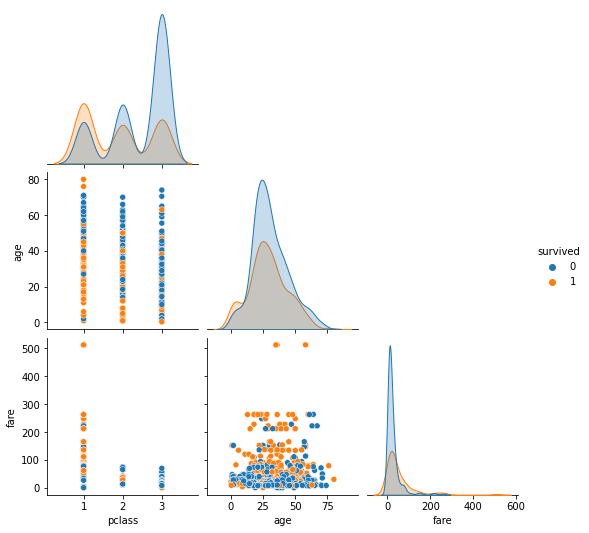

In [20]:
import seaborn as sns

_ = sns.pairplot(data=titanic, hue="survived", corner=True)

While versatile, this method cannot deal with categorical variables, we can use an `OrdinalEncoder` to transform the data:

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

cat_col_selector = selector(dtype_include="category")
quant_cols_selector = selector(dtype_exclude="category")

cat_cols = cat_col_selector(titanic)
quant_cols = quant_cols_selector(titanic)

encoder_transformer = ColumnTransformer(
    [("ordinal_encoder", OrdinalEncoder(), cat_cols)],
    remainder = "passthrough"
)

Pay attention to the column ordering:

In [25]:
titanic.head()

,pclass,survived,sex,age,fare,embarked,has_family
0,1,1,female,29.0,211.3375,S,False
1,1,1,male,0.9167,151.55,S,True
2,1,0,female,2.0,151.55,S,True
3,1,0,male,30.0,151.55,S,True
4,1,0,female,25.0,151.55,S,True


In [26]:
pd.DataFrame(encoder_transformer.fit_transform(titanic), columns=cat_cols + quant_cols).head()

,survived,sex,embarked,has_family,pclass,age,fare
0,1.0,0.0,2.0,0.0,1,29.0,211.3375
1,1.0,1.0,2.0,1.0,1,0.9167,151.55
2,0.0,0.0,2.0,1.0,1,2.0,151.55
3,0.0,1.0,2.0,1.0,1,30.0,151.55
4,0.0,0.0,2.0,1.0,1,25.0,151.55


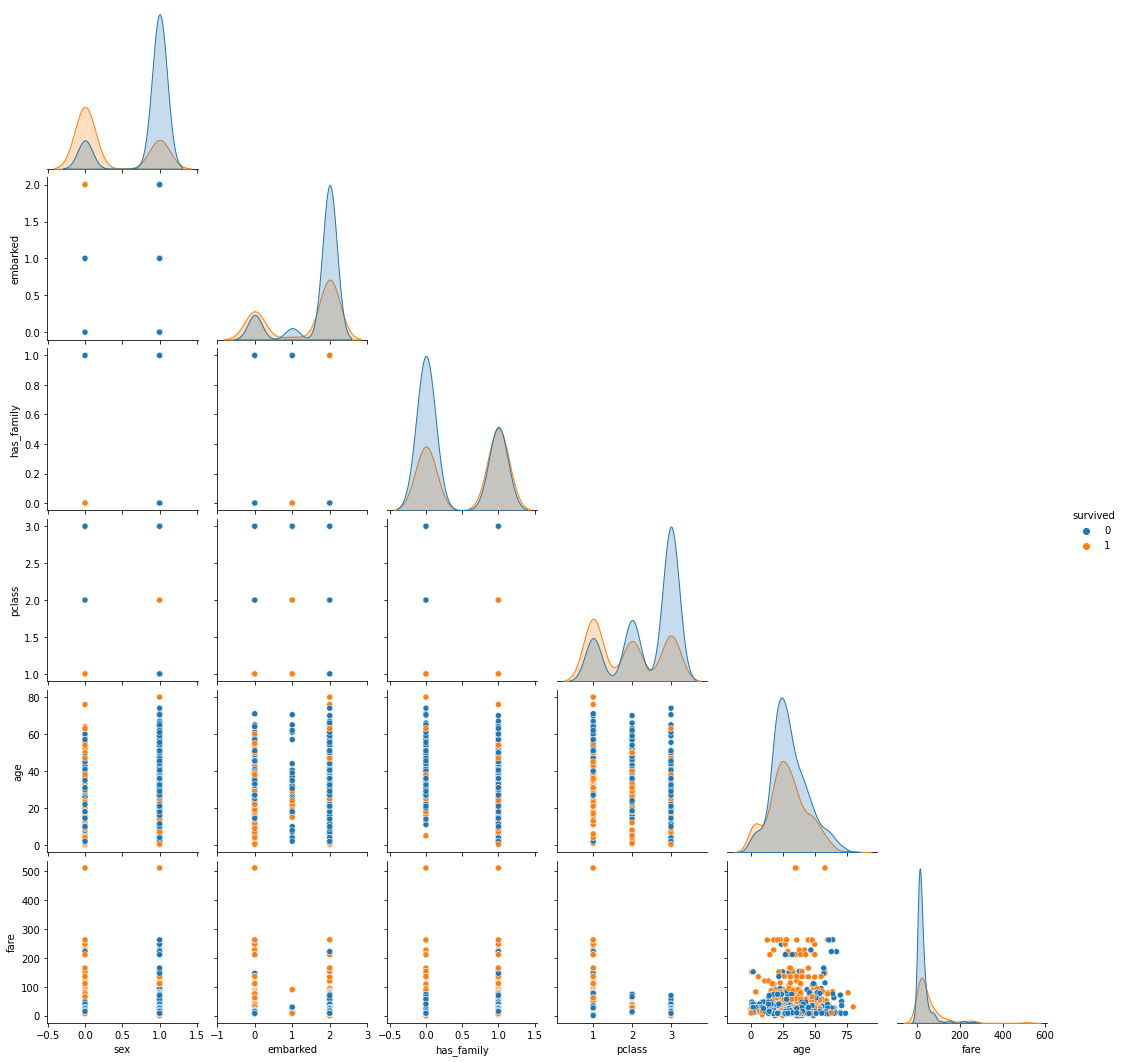

In [ ]:
_ = (
    pd.DataFrame(
    data=encoder_transformer.fit_transform(titanic),
    columns=cat_cols + quant_cols
    )
    .convert_dtypes()
    .astype({"age": "Float32", "fare": "Float32"})
    .pipe(
        sns.pairplot,
        hue="survived",
        corner=True
        )
)

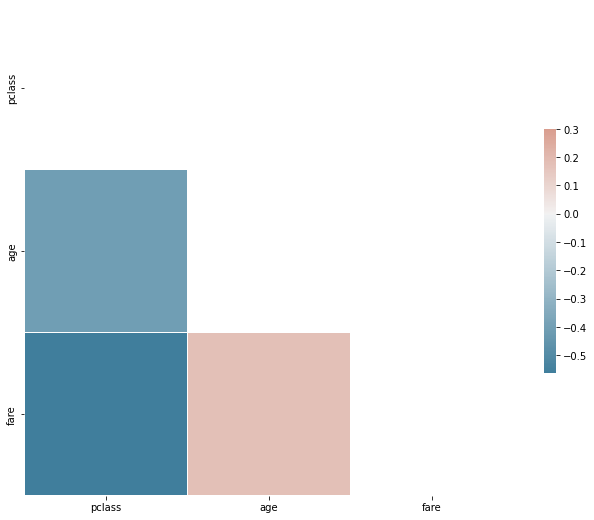

In [ ]:
import matplotlib.pyplot as plt

def heatmap_plot(data):

    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=.3,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5}
        )
    
_ = heatmap_plot(titanic)

In [ ]:
target_cols = ["pclass", "survived"]


data = (
    titanic
    .drop(columns=target_cols)
    # dtypes conversion is necessary because sklearn is not compatible with categories yet
    .astype({"sex": "string", "embarked": "string", "has_family": "bool"})
)

target = (
    titanic
    .filter(target_cols)
    .astype({"pclass": "string", "survived": "string"})
)

3. Split in train and test set

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.25
)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 893 to 1251
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   sex         782 non-null    category
 1   age         782 non-null    Float64 
 2   fare        782 non-null    Float64 
 3   embarked    782 non-null    category
 4   has_family  782 non-null    category
dtypes: Float64(2), category(3)
memory usage: 22.5 KB


In [ ]:
target_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 893 to 1251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    782 non-null    category
 1   survived  782 non-null    category
dtypes: category(2)
memory usage: 7.9 KB


In [ ]:
target_train.head()

,pclass,survived
893,3,0
938,3,0
434,2,1
690,3,0
249,1,1


4. Column preprocessing with `make_column_selector`

In [ ]:
from sklearn.compose import make_column_selector as selector

cat_column_types = ["object", "category"]

categorical_column_selector = selector(dtype_include=cat_column_types)
quantitative_columns_selector = selector(dtype_exclude=cat_column_types)

categorical_cols = categorical_column_selector(data)
quantitative_cols = quantitative_columns_selector(data)

In [ ]:
categorical_cols, quantitative_cols

(['sex', 'embarked', 'has_family'], ['age', 'fare'])

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
onehot_enc = OneHotEncoder(sparse=False)
ordinal_enc = OrdinalEncoder()

logreg_col_transformer = ColumnTransformer(
    transformers = [
        ("quantitative_preprocessor", scaler, quantitative_cols),
        ("categorical_preprocessor", onehot_enc, categorical_cols),
    ]
)

rf_col_transformer = ColumnTransformer(
    transformers = [
        ("quantitative_preprocessor", scaler, quantitative_cols),
        ("categorical_preprocessor", ordinal_enc, categorical_cols),
    ]
)

5. Baseline estimator with `DummyClassifier`

In [ ]:
...

6. Baseline estimator with `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

logreg_pipeline = Pipeline(
    steps = [
        ("preprocessor", logreg_col_transformer),
        ("logreg", MultiOutputClassifier(LogisticRegressionCV()))
    ]
)

logreg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('quantitative_preprocessor',
                                                  StandardScaler(),
                                                  ['age', 'fare']),
                                                 ('categorical_preprocessor',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'embarked',
                                                   'has_family'])])),
                ('logreg',
                 MultiOutputClassifier(estimator=LogisticRegressionCV()))])

In [ ]:
_ = logreg_pipeline.fit(data_train, target_train)

7. Cross Validation

In [ ]:
logreg_cv_res = cross_validate(logreg_pipeline, data_train, target_train)

In [ ]:
print(
    f"{logreg_cv_res['test_score'].mean():0.2f}",
    "+/- " 
    f"{logreg_cv_res['test_score'].std():0.2f}"
)

0.60 +/- 0.03


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

rf_pipeline = Pipeline(
    steps = [
        ("preprocessor", rf_col_transformer),
        ("logreg", MultiOutputClassifier(HistGradientBoostingClassifier()))
    ]
)

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('quantitative_preprocessor',
                                                  StandardScaler(),
                                                  ['age', 'fare']),
                                                 ('categorical_preprocessor',
                                                  OrdinalEncoder(),
                                                  ['sex', 'embarked',
                                                   'has_family'])])),
                ('logreg',
                 MultiOutputClassifier(estimator=HistGradientBoostingClassifier()))])

In [ ]:
rf_cv_res = cross_validate(rf_pipeline, data_train, target_train)

print(
    f"{rf_cv_res['test_score'].mean():0.2f}",
    "+/- " 
    f"{rf_cv_res['test_score'].std():0.2f}"
)

0.73 +/- 0.05


8. Hyperparameter Tuning

In [ ]:
...

## References

* [scikit-learn docs](https://colab.research.google.com/drive/1lvFxCtWswt_C2ruZczA4mH_RZYC8DlGa?authuser=2#scrollTo=Kk1gPwCrykIz)